In [48]:
import numpy as np
import matplotlib.pyplot as plt
import stats
from iminuit import Minuit
from iminuit.cost import ExtendedUnbinnedNLL,UnbinnedNLL,LeastSquares
from IPython.display import Latex

In [49]:
def f(x,p_0,p_1):
    x = np.array(x)
    return (np.power((x-p_0),3) + p_1)

In [50]:
def gen_data(x,mu=0,sigma=1):
    return np.array([f(i,2,3) + stats.normal(mu,sigma,n=100) for i in x])

<h2>Grafico Dati

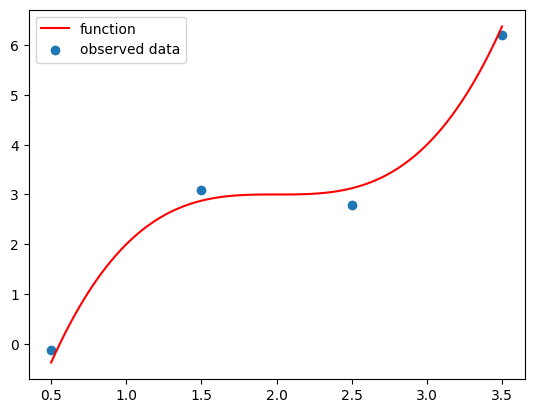

In [51]:
# funzione continua
x = np.linspace(0.5,3.5,100)
y = gen_data(x,0,0)
plt.plot(x,y, c = 'r')

# dati
x = [0.5, 1.5, 2.5, 3.5]
y = gen_data(x,mu=0,sigma=0.2)
plt.scatter(x,y)

plt.legend(['function','observed data'])
plt.show()

<h2>Fit

In [52]:
def fit(x,y,yerror,p_0,p_1):
    cost = LeastSquares(x,y,yerror,f)
    my_minuit = Minuit(cost, p_0=p_0, p_1=p_1)
    my_minuit.migrad()
    my_minuit.hesse()
    return my_minuit

In [53]:
my_minuit = fit(x,y,0.3,2,3)
display(my_minuit)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.688 (χ²/ndof = 1.3)      │              Nfcn = 41               │
│ EDM = 9.26e-11 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p_0  │   1.99    │   0.05    │            │            │         │         │       │
│ 1 │ p_1  │   2.94    │   0.23    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────┐
│     │     p_0     p_1 │
├─────┼─────────────────┤
│ p_0 │ 0.00217  0.0081 │
│ p_1 │  0.0081   0.053 │
└─────┴─────────────────┘

In [54]:
Latex(f"$$Q^2 = {{{my_minuit.fval}}} \\newline doF = {{{my_minuit.ndof}}}$$")

<IPython.core.display.Latex object>

In [55]:
def fit_likelihood(y,p_0,p_1):
    cost = UnbinnedNLL(y,f)
    my_minuit = Minuit(cost, p_0=2, p_1=3)
    my_minuit.migrad()
    my_minuit.hesse()
    # display(my_minuit)
    return my_minuit

In [63]:
def toy(x,N):
    q_s = []
    for i in range(N):
        y = gen_data(x,mu=0,sigma=0.1)
        Q = fit(x,y,0.3,2,3).fval
        # p = fit(x,y,0.3,2,3).
        
        q_s.append(Q)
    return q_s

In [64]:
data = toy(x,1000)

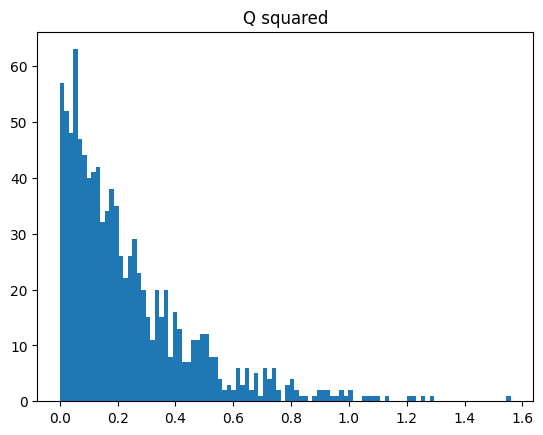

In [66]:
plt.hist(data,bins=100)
plt.title("Q squared")
plt.show()